In [1]:
import torch
from torch import nn
from matplotlib import pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


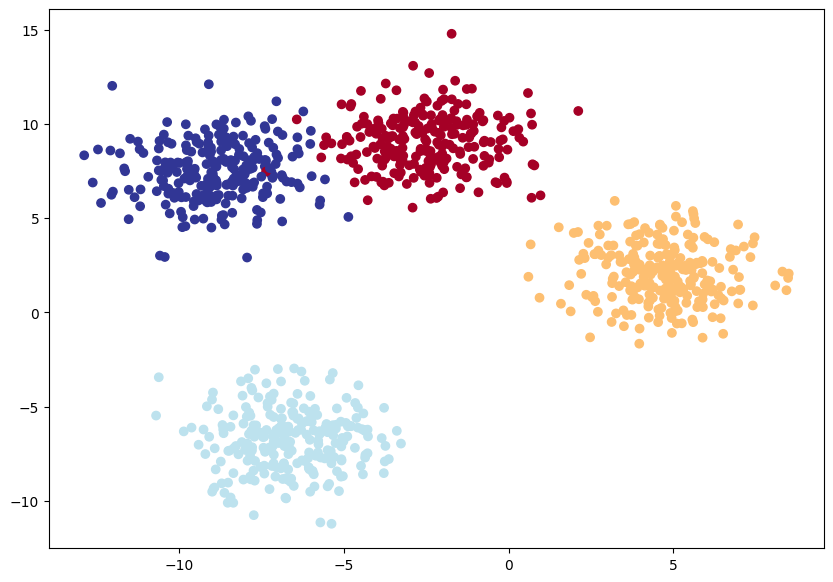

In [2]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            random_state=RANDOM_SEED,
                            cluster_std=1.5)

# 2. Turn the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split the data into into train and test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, 
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### Building a multi-class classification model

In [3]:
# As he always says, create a device agnostic code.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
# Let's set up our neural network architecture
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=4),
    
)
model


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=4, bias=True)
)

### Create a loss function and an optimizer

In [5]:
# Loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Setup an optimizer
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.01)

### Getting prediction probabilities for multi-class model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to predictions labels.

So usually, we move from logits(raw output of the model) -> Pred Probs(use `torch.Softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [6]:
# Let's play a bit with the untrained parameters of our model in making predictions
model.eval()
with torch.inference_mode():
    y_logits = model(X_blob_test)

y_logits[:5]

tensor([[ 0.2124, -0.1497,  0.5297,  0.6680],
        [ 0.1058,  0.3204,  0.1516,  1.0312],
        [-0.2320, -0.0055,  0.1240,  0.4644],
        [-0.0328,  0.0614,  0.3988,  0.5386],
        [ 0.5701, -0.4032,  0.4372,  0.9665]])

These outputs are logits. we need to convert them to pred probabilities before getting the pred labels. 

In [7]:
# Convert the model's logit output to Pred Probs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.2124, -0.1497,  0.5297,  0.6680],
        [ 0.1058,  0.3204,  0.1516,  1.0312],
        [-0.2320, -0.0055,  0.1240,  0.4644],
        [-0.0328,  0.0614,  0.3988,  0.5386],
        [ 0.5701, -0.4032,  0.4372,  0.9665]])
tensor([[0.2152, 0.1498, 0.2956, 0.3394],
        [0.1722, 0.2134, 0.1802, 0.4343],
        [0.1758, 0.2205, 0.2510, 0.3527],
        [0.1849, 0.2031, 0.2846, 0.3274],
        [0.2674, 0.1010, 0.2341, 0.3975]])


In [8]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3])

In [9]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

The previous two cells show the outputs of our untrained model against ground truth. We can see our model does very bad here. we can improve it through training.

In [10]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [11]:
# Build a training loop
torch.manual_seed(42)

# set the epochs
epochs = 100

for epoch in range(epochs):
    # train the model
    model.train()

    # Forward Propagation
    y_logits = model(X_blob_train).squeeze()
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)

    # Compute the loss/accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, 
                      y_pred=y_pred_labels)
    

    # Optimizer
    optimizer.zero_grad()

    # Back Propagation
    loss.backward()

    # Gradient Boosting
    optimizer.step()


    # TEST
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_blob_test).squeeze()
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        # evaluate the predictions
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,y_pred=test_preds)

     # Print the performance
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")









Epoch: 0 | Loss: 1.34725, Accuracy: 24.12% | Test Loss: 1.22485, Test acc: 28.50%
Epoch: 10 | Loss: 0.85017, Accuracy: 73.75% | Test Loss: 0.79162, Test acc: 83.50%
Epoch: 20 | Loss: 0.39565, Accuracy: 96.75% | Test Loss: 0.34408, Test acc: 97.50%
Epoch: 30 | Loss: 0.08808, Accuracy: 99.12% | Test Loss: 0.07198, Test acc: 99.50%
Epoch: 40 | Loss: 0.03911, Accuracy: 99.25% | Test Loss: 0.02880, Test acc: 99.50%
Epoch: 50 | Loss: 0.02971, Accuracy: 99.12% | Test Loss: 0.02021, Test acc: 99.50%
Epoch: 60 | Loss: 0.02701, Accuracy: 99.12% | Test Loss: 0.01737, Test acc: 99.50%
Epoch: 70 | Loss: 0.02567, Accuracy: 99.12% | Test Loss: 0.01592, Test acc: 99.50%
Epoch: 80 | Loss: 0.02488, Accuracy: 99.38% | Test Loss: 0.01521, Test acc: 99.50%
Epoch: 90 | Loss: 0.02430, Accuracy: 99.25% | Test Loss: 0.01441, Test acc: 99.50%


In [12]:
from helper_functions import plot_predictions, plot_decision_boundary

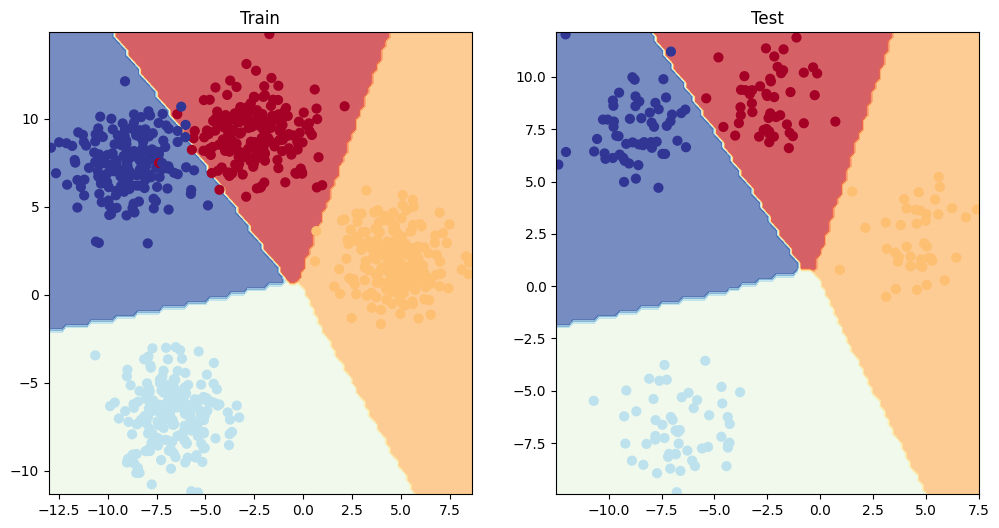

In [13]:
# Plot decision boundary of the model 
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)